#Import Dataset



In [1]:
#Import Library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


#Get The Data from Gdrive

In [2]:
#mengambil data dari gdrive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


##Read Dataset

In [75]:
#menampilkan data csv yang diambil dari gdrive
PATH = '/content/drive/MyDrive/Eduwork/Covid19/covid_19_indonesia_time_series_all.csv'
df = pd.read_csv(PATH)
df

,Date,Location ISO Code,Location,New Cases,New Deaths,New Recovered,New Active Cases,Total Cases,Total Deaths,Total Recovered,...,Latitude,New Cases per Million,Total Cases per Million,New Deaths per Million,Total Deaths per Million,Total Deaths per 100rb,Case Fatality Rate,Case Recovered Rate,Growth Factor of New Cases,Growth Factor of New Deaths
0,3/1/2020,ID-JK,DKI Jakarta,2,0,0,2,39,20,75,...,-6.204699,0.18,3.60,0.0,1.84,0.18,51.28%,192.31%,NaN,NaN
1,3/2/2020,ID-JK,DKI Jakarta,2,0,0,2,41,20,75,...,-6.204699,0.18,3.78,0.0,1.84,0.18,48.78%,182.93%,1.00,1.00
2,3/2/2020,IDN,Indonesia,2,0,0,2,2,0,0,...,-0.789275,0.01,0.01,0.0,0.00,0.00,0.00%,0.00%,NaN,NaN
3,3/2/2020,ID-RI,Riau,1,0,0,1,1,0,1,...,0.511648,0.16,0.16,0.0,0.00,0.00,0.00%,100.00%,NaN,NaN
4,3/3/2020,ID-JK,DKI Jakarta,2,0,0,2,43,20,75,...,-6.204699,0.18,3.96,0.0,1.84,0.18,46.51%,174.42%,1.00,1.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31817,9/15/2022,ID-SA,Sulawesi Utara,37,0,0,37,52770,1213,50997,...,1.259638,14.01,19974.38,0.0,459.14,45.91,2.30%,96.64%,2.85,1.00
31818,9/15/2022,ID-SB,Sumatera Barat,13,0,3,10,104640,2371,102066,...,-0.850253,2.36,18959.11,0.0,429.59,42.96,2.27%,97.54%,6.50,1.00
31819,9/15/2022,ID-SS,Sumatera Selatan,16,0,1,15,82198,3376,78510,...,-3.216212,1.95,10002.74,0.0,410.83,41.08,4.11%,95.51%,3.20,1.00
31820,9/15/2022,ID-SU,Sumatera Utara,50,0,5,45,158866,3288,154924,...,2.191894,3.36,10680.15,0.0,221.04,22.10,2.07%,97.52%,1.92,1.00


In [79]:
#df['Total Deaths'].sum()
len(df['Location'])

31822

# Understanding and Preprocessing Dataset

##Informasi Tipe Dataset

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31822 entries, 0 to 31821
Data columns (total 38 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Date                         31822 non-null  object 
 1   Location ISO Code            31822 non-null  object 
 2   Location                     31822 non-null  object 
 3   New Cases                    31822 non-null  int64  
 4   New Deaths                   31822 non-null  int64  
 5   New Recovered                31822 non-null  int64  
 6   New Active Cases             31822 non-null  int64  
 7   Total Cases                  31822 non-null  int64  
 8   Total Deaths                 31822 non-null  int64  
 9   Total Recovered              31822 non-null  int64  
 10  Total Active Cases           31822 non-null  int64  
 11  Location Level               31822 non-null  object 
 12  City or Regency              0 non-null      float64
 13  Province        

##Unique Data

In [6]:
#cek unik data
df.nunique()

,0
Date,930
Location ISO Code,35
Location,35
New Cases,2591
New Deaths,405
New Recovered,2541
New Active Cases,2562
Total Cases,22951
Total Deaths,6419
Total Recovered,21124


###Handling Unique Data

In [7]:
#handling uniq data dengan hapus kolom Country dan Continent
df.drop(["Country", "Continent"], axis=1, inplace=True)

##Missing Value

In [8]:
#cek missing value
df.isnull().sum()

,0
Date,0
Location ISO Code,0
Location,0
New Cases,0
New Deaths,0
New Recovered,0
New Active Cases,0
Total Cases,0
Total Deaths,0
Total Recovered,0


###Handling Missing Value

In [9]:
# Hapus kolom dengan missing value di atas 50%
threshold = len(df) * 0.5
df.dropna(thresh=threshold, axis=1, inplace=True)

# Handling missing value numeric data dengan rata-rata
columns_to_fill = ['Total Cities', 'Total Urban Villages', 'Total Rural Villages', 'Growth Factor of New Cases', 'Growth Factor of New Deaths']
# Isi missing value dengan rata-rata dari masing-masing kolom
for column in columns_to_fill:
    df[column].fillna(df[column].mean(), inplace=True)

# Handling missing value objek data dengan unknown
# Kolom yang akan diisi dengan 'Unknown'
columns_to_fill2 = ['Province', 'Island', 'Time Zone']
# Isi missing value dengan 'Unknown' untuk masing-masing kolom
for columns in columns_to_fill2:
    df[columns].fillna('Unknown', inplace=True)


###Make Sure Nothing Missing Value in Data

In [10]:
#cek missing value kembali
df.isnull().sum()

,0
Date,0
Location ISO Code,0
Location,0
New Cases,0
New Deaths,0
New Recovered,0
New Active Cases,0
Total Cases,0
Total Deaths,0
Total Recovered,0


##Outlier

In [11]:
#cek outlier

def detect_and_plot_outliers(df):
    # Menghitung IQR dan mendeteksi outlier
    outliers = pd.DataFrame()
    for col in df.select_dtypes(include=['float64', 'int64']).columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers_in_col = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
        outliers = pd.concat([outliers, outliers_in_col])

    # Membuat box plot untuk setiap kolom numerik
    df.select_dtypes(include=['float64', 'int64']).boxplot(figsize=(10, 8))
    plt.xticks(rotation=90)
    plt.show()

    return outliers

In [12]:
# Select numeric columns
numeric_df = df.select_dtypes(include=['number'])

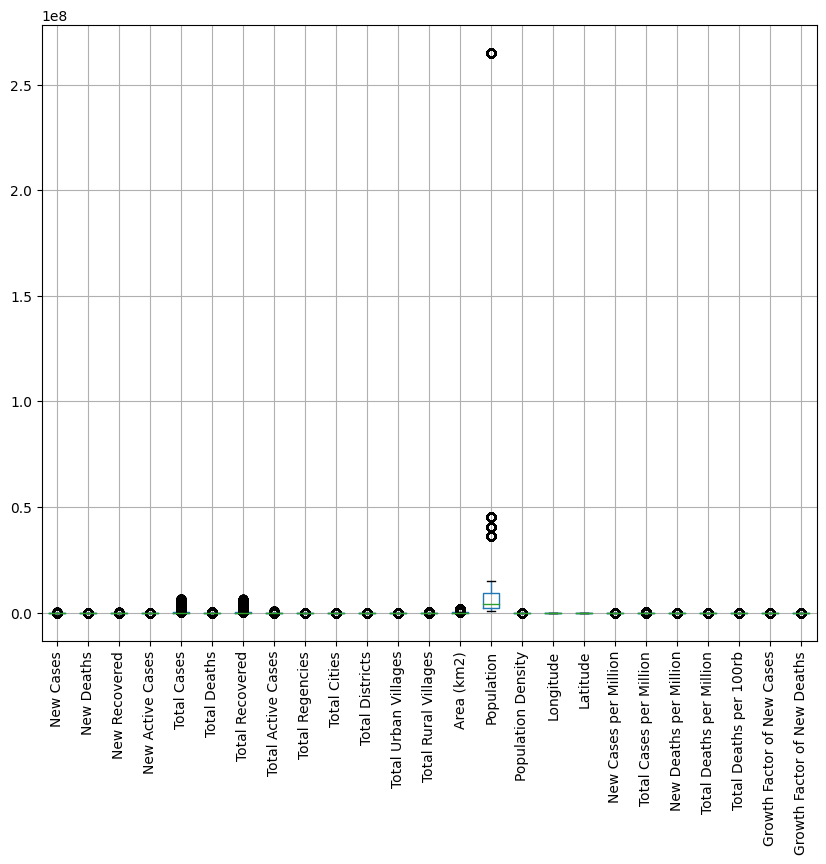

In [13]:
# Deteksi dan plot outlier
outliers = detect_and_plot_outliers(numeric_df)

###Handling Outlier

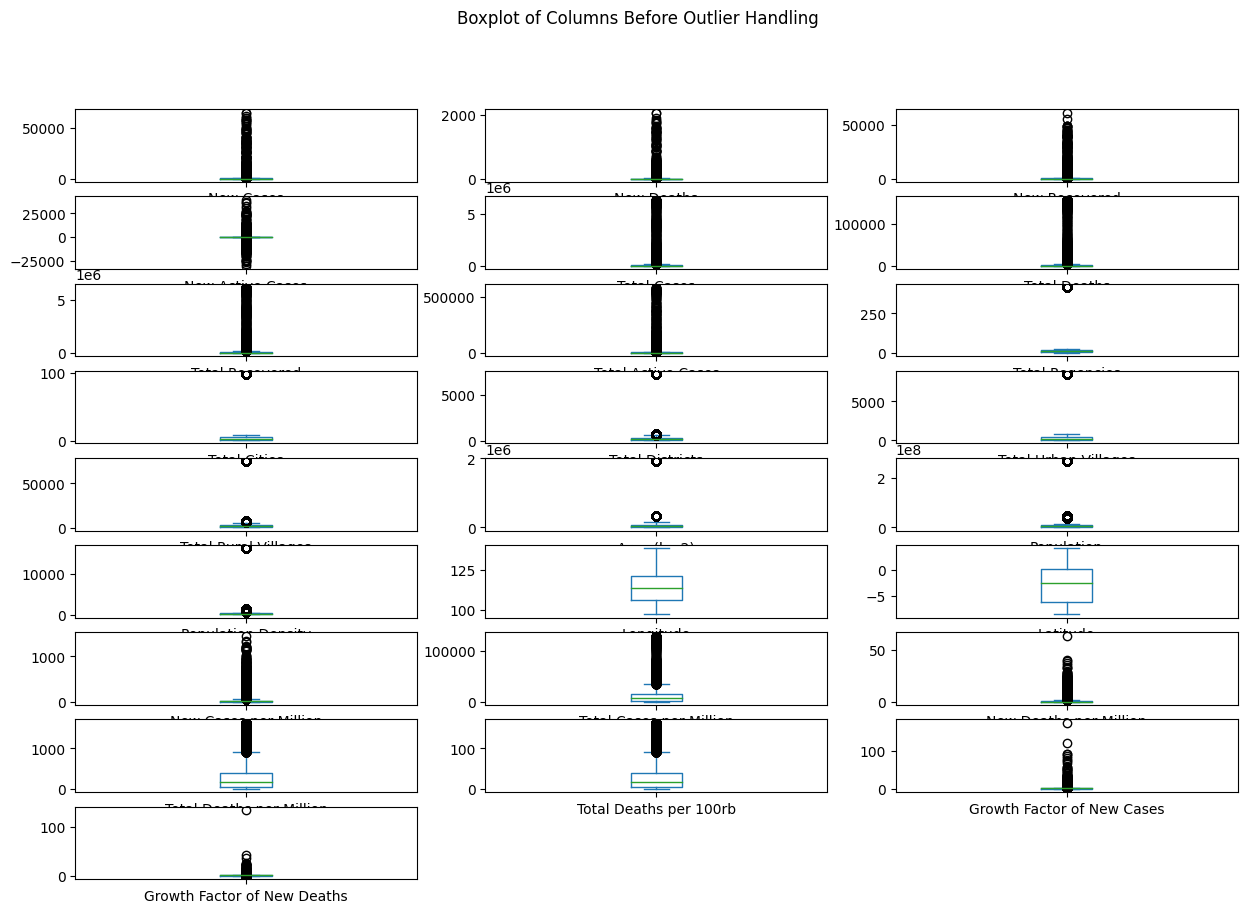

<ipython-input-14-7aecd124104d>:36: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '23596.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[z_scores > threshold, column] = replace_value
<ipython-input-14-7aecd124104d>:36: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '565.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[z_scores > threshold, column] = replace_value
<ipython-input-14-7aecd124104d>:36: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '21027.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[z_scores > threshold, column] = replace_value


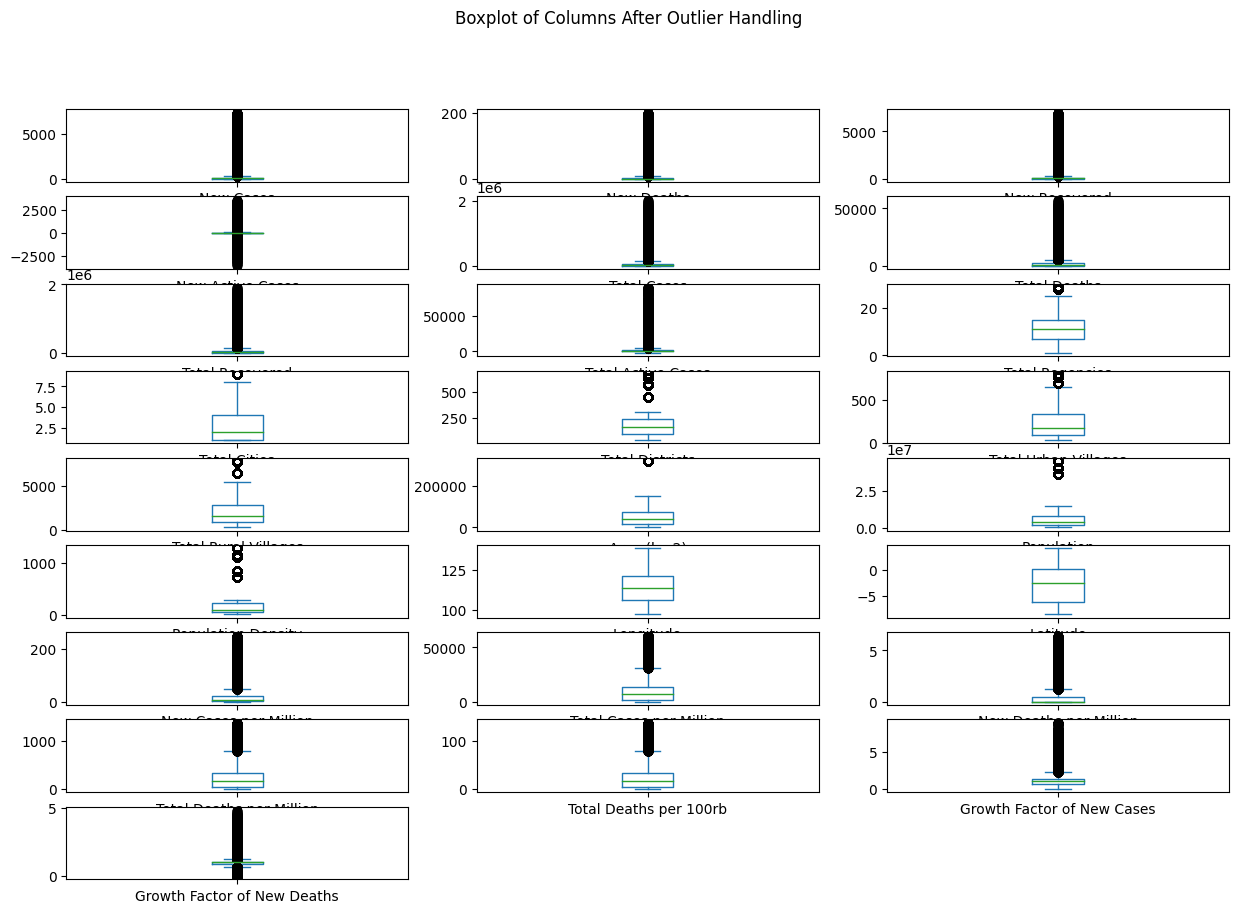

In [14]:
import matplotlib.pyplot as plt
from scipy.stats.mstats import winsorize

def handle_outliers(df, threshold=3, method='median'):
    """
    Handle outliers in a DataFrame by replacing them with the specified method.

    Parameters:
    - df: DataFrame containing the data.
    - threshold: Z-score threshold for identifying outliers (default is 3).
    - method: Method for replacing outliers ('median', 'mean', or 'winsorize').

    Returns:
    - DataFrame with outliers replaced according to the specified method.
    """
    # Display initial boxplot for all columns
    df.plot(kind='box', subplots=True, layout=(int(np.ceil(len(df.columns)/3)), 3), figsize=(15, 10))
    plt.suptitle('Boxplot of Columns Before Outlier Handling')
    plt.show()

    for column in df.columns:
        if np.issubdtype(df[column].dtype, np.number):
            z_scores = np.abs((df[column] - df[column].mean()) / df[column].std())

            if method == 'median':
                replace_value = df[column].median()
            elif method == 'mean':
                replace_value = df[column].mean()
            elif method == 'winsorize':
                winsorized_values = winsorize(df[column], limits=[0.05, 0.05])
                df[column] = winsorized_values
                continue  # Move to the next column
            else:
                raise ValueError("Invalid method. Use 'median', 'mean', or 'winsorize'.")

            df.loc[z_scores > threshold, column] = replace_value

    # Display boxplot after outlier handling
    df.plot(kind='box', subplots=True, layout=(int(np.ceil(len(df.columns)/3)), 3), figsize=(15, 10))
    plt.suptitle('Boxplot of Columns After Outlier Handling')
    plt.show()

    return df

numeric_df = handle_outliers(numeric_df, threshold=3, method='median')

##Duplicat Data

In [15]:
#cek data duplikat
df.duplicated().sum()

0

##Change Tipe Data

In [16]:
#mengubah tipe data date
df['Date'] = pd.to_datetime(df['Date'])

In [17]:
#cek kembali info data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31822 entries, 0 to 31821
Data columns (total 34 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   Date                         31822 non-null  datetime64[ns]
 1   Location ISO Code            31822 non-null  object        
 2   Location                     31822 non-null  object        
 3   New Cases                    31822 non-null  int64         
 4   New Deaths                   31822 non-null  int64         
 5   New Recovered                31822 non-null  int64         
 6   New Active Cases             31822 non-null  int64         
 7   Total Cases                  31822 non-null  int64         
 8   Total Deaths                 31822 non-null  int64         
 9   Total Recovered              31822 non-null  int64         
 10  Total Active Cases           31822 non-null  int64         
 11  Location Level               31822 non-nu

In [18]:
#melihat kolom Case Fataity Rate
df["Case Fatality Rate"].unique()
df["Case Recovered Rate"].unique()

#mengubah data object Case Fatality Rate menjadi integer dengan membaginya per 100
df['Case Fatality Rate'] = df['Case Fatality Rate'].str.replace('%', '').astype(float)
df['Case Recovered Rate'] = df['Case Recovered Rate'].str.replace('%', '').astype(float)


In [19]:
#hapus indonesia
df = df[df['Location'] != 'Indonesia']

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30893 entries, 0 to 31820
Data columns (total 34 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   Date                         30893 non-null  datetime64[ns]
 1   Location ISO Code            30893 non-null  object        
 2   Location                     30893 non-null  object        
 3   New Cases                    30893 non-null  int64         
 4   New Deaths                   30893 non-null  int64         
 5   New Recovered                30893 non-null  int64         
 6   New Active Cases             30893 non-null  int64         
 7   Total Cases                  30893 non-null  int64         
 8   Total Deaths                 30893 non-null  int64         
 9   Total Recovered              30893 non-null  int64         
 10  Total Active Cases           30893 non-null  int64         
 11  Location Level               30893 non-null  o

##Korelasi Data

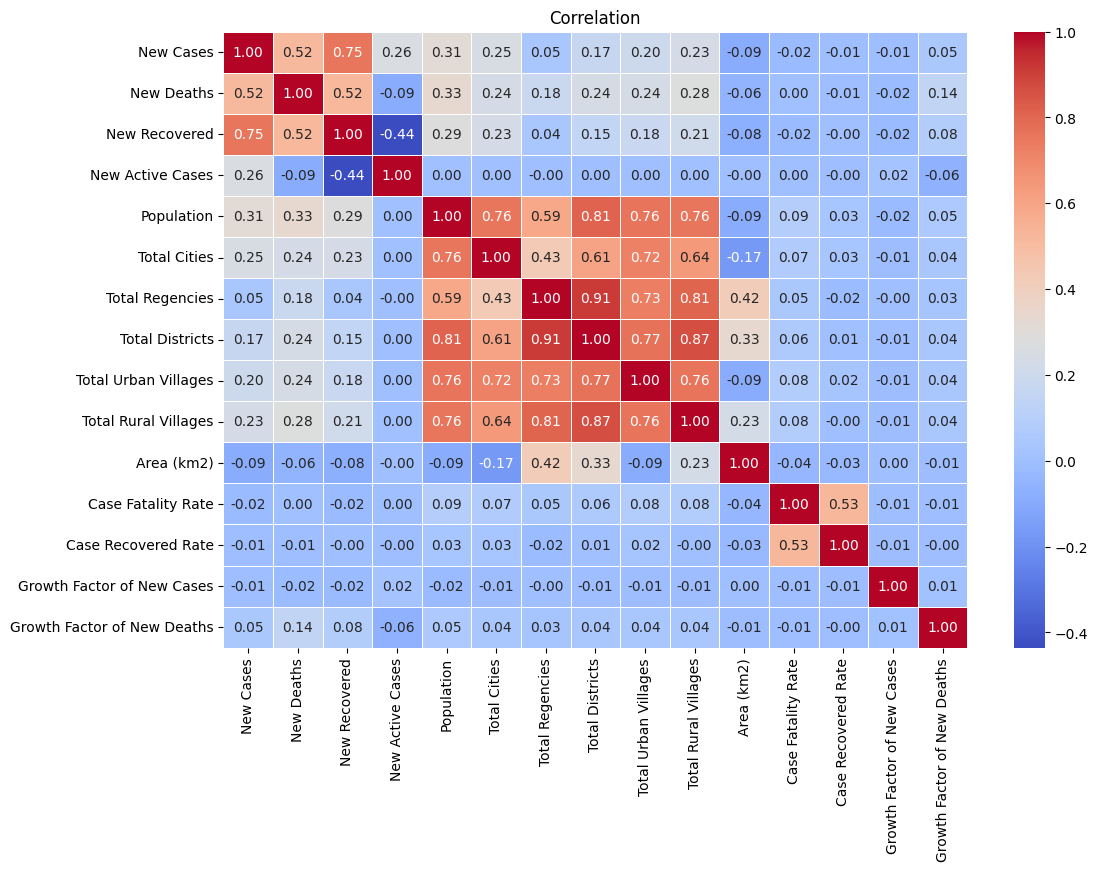

                             New Cases  New Deaths  New Recovered  \
New Cases                     1.000000    0.515777       0.754382   
New Deaths                    0.515777    1.000000       0.522108   
New Recovered                 0.754382    0.522108       1.000000   
New Active Cases              0.261928   -0.088060      -0.435547   
Population                    0.313525    0.333357       0.285932   
Total Cities                  0.253814    0.235043       0.232350   
Total Regencies               0.045859    0.183232       0.038569   
Total Districts               0.165070    0.240737       0.148852   
Total Urban Villages          0.197454    0.242714       0.179424   
Total Rural Villages          0.232993    0.276641       0.211971   
Area (km2)                   -0.088100   -0.055310      -0.081358   
Case Fatality Rate           -0.022434    0.002623      -0.021662   
Case Recovered Rate          -0.005481   -0.007156      -0.001887   
Growth Factor of New Cases   -0.00

In [21]:
#cek korelasi data numerik dengan heatmap
# Memilih kolom numerik
correlation_matrix = df[['New Cases','New Deaths','New Recovered','New Active Cases','Population','Total Cities','Total Regencies','Total Districts','Total Urban Villages','Total Rural Villages','Area (km2)','Case Fatality Rate','Case Recovered Rate','Growth Factor of New Cases','Growth Factor of New Deaths']].corr()

# Membuat heatmap dari matriks korelasi
plt.figure(figsize=(12, 8))  # Atur ukuran gambar
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, fmt='.2f')
# Menambahkan judul
plt.title('Correlation')

# Menampilkan heatmap
plt.show()
print(correlation_matrix)




#Save Dataset After Preprocessing Dataset

In [22]:
#menyimpan df yang telah dilakukan preprocessing data
df.to_csv('covid_19_indonesia_preprocessed.csv', index=False)

#Describe Dataset

In [23]:
#describe data
df.describe()

,Date,New Cases,New Deaths,New Recovered,New Active Cases,Total Cases,Total Deaths,Total Recovered,Total Active Cases,Total Regencies,...,Latitude,New Cases per Million,Total Cases per Million,New Deaths per Million,Total Deaths per Million,Total Deaths per 100rb,Case Fatality Rate,Case Recovered Rate,Growth Factor of New Cases,Growth Factor of New Deaths
count,30893,30893.000000,30893.000000,30893.000000,30893.000000,3.089300e+04,30893.000000,3.089300e+04,30893.000000,30893.000000,...,30893.000000,30893.000000,30893.000000,30893.000000,30893.000000,30893.000000,30893.000000,30893.000000,30893.000000,30893.000000
mean,2021-06-18 01:54:03.647428352,207.079565,5.108568,200.840093,1.130903,8.204233e+04,2354.077202,7.681409e+04,2874.153303,12.240054,...,-2.783911,28.197475,11520.430172,0.640289,289.489398,28.948904,4.092969,87.076151,1.335549,1.031503
min,2020-03-01 00:00:00,0.000000,0.000000,0.000000,-19976.000000,1.000000e+00,0.000000,0.000000e+00,-2343.000000,1.000000,...,-8.682205,0.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2020-11-03 00:00:00,3.000000,0.000000,2.000000,-12.000000,4.905000e+03,121.000000,3.685000e+03,75.000000,7.000000,...,-6.204699,0.760000,1287.870000,0.000000,38.450000,3.850000,1.860000,76.500000,0.670000,0.900000
50%,2021-06-18 00:00:00,24.000000,0.000000,18.000000,0.000000,2.268400e+04,539.000000,1.952100e+04,519.000000,11.000000,...,-2.993595,5.510000,6786.780000,0.000000,158.090000,15.810000,2.630000,90.390000,1.000000,1.000000
75%,2022-01-31 00:00:00,113.000000,3.000000,106.000000,17.000000,6.467900e+04,1885.000000,6.116000e+04,2025.000000,15.000000,...,0.212037,22.110000,14250.120000,0.520000,387.730000,38.770000,3.740000,96.640000,1.326795,1.033834
max,2022-09-15 00:00:00,16251.000000,545.000000,23872.000000,13108.000000,1.412511e+06,33489.000000,1.386134e+06,188636.000000,29.000000,...,4.225615,1459.040000,130231.620000,63.800000,1632.600000,163.260000,1000.000000,11100.000000,175.000000,134.500000
std,NaN,771.874452,22.344819,813.941207,558.652362,1.852533e+05,5471.624776,1.778584e+05,9003.791351,7.363519,...,3.646021,75.073338,16651.867316,1.951164,366.431814,36.643191,14.605512,144.725339,2.634139,1.288845


#Eksplorasi Visualisaasi Data Analysis

##Time Series

###Monthly New Cases

In [24]:
# Set kolom Date sebagai index
df.set_index('Date', inplace=True)


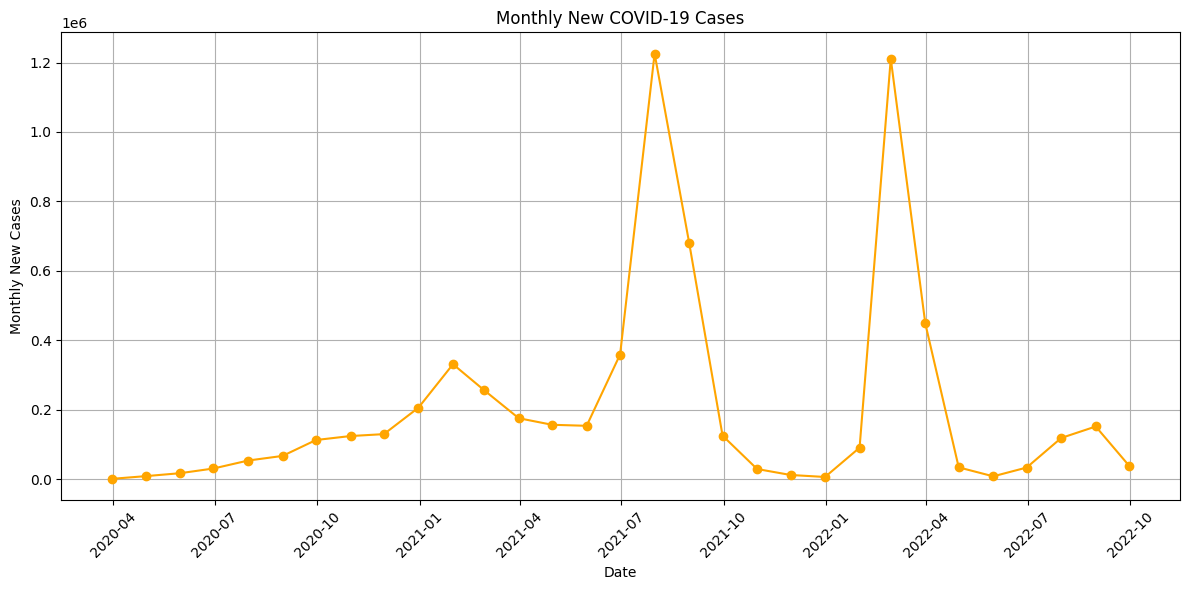

In [25]:
# Resample data per bulan dan hitung jumlah kasus baru setiap bulan
monthly_cases = df['New Cases'].resample('M').sum()

# Buat grafik tren garis bulanan
plt.figure(figsize=(12, 6))
plt.plot(monthly_cases.index, monthly_cases.values, marker='o', linestyle='-', color='orange')
plt.xlabel('Date')
plt.ylabel('Monthly New Cases')
plt.title('Monthly New COVID-19 Cases')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

###Monthly New Deaths

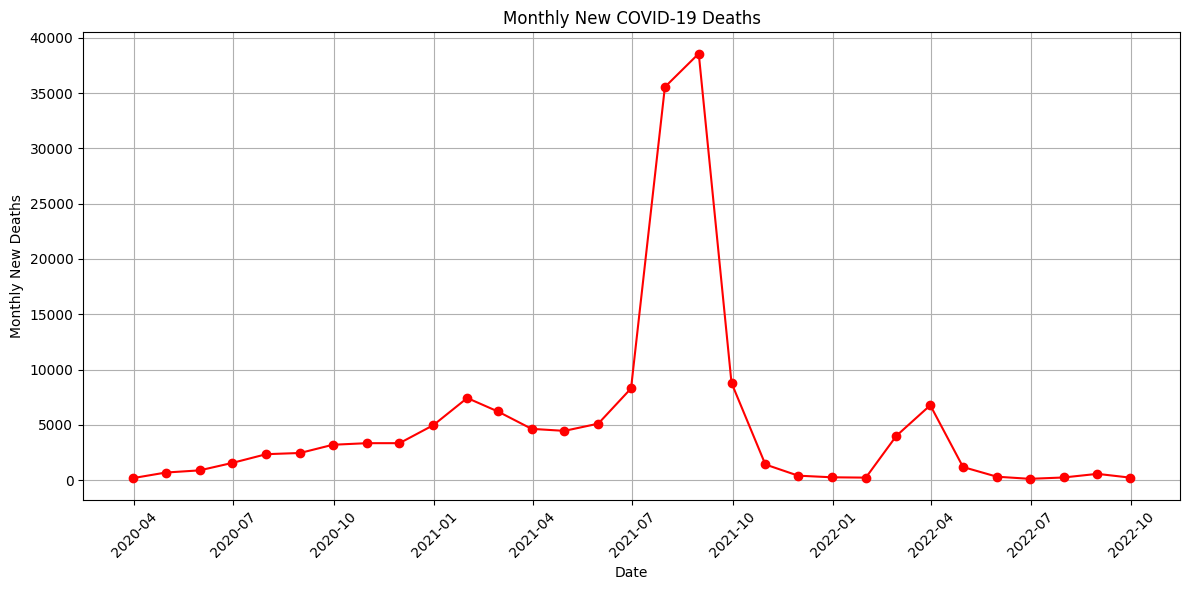

In [26]:
# Resample data per bulan dan hitung kematian kasus baru setiap bulan
monthly_deaths = df['New Deaths'].resample('M').sum()

# Buat grafik tren garis bulanan
plt.figure(figsize=(12, 6))
plt.plot(monthly_deaths.index, monthly_deaths.values, marker='o', linestyle='-', color='red')
plt.xlabel('Date')
plt.ylabel('Monthly New Deaths')
plt.title('Monthly New COVID-19 Deaths')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

###Monthly New Recovered

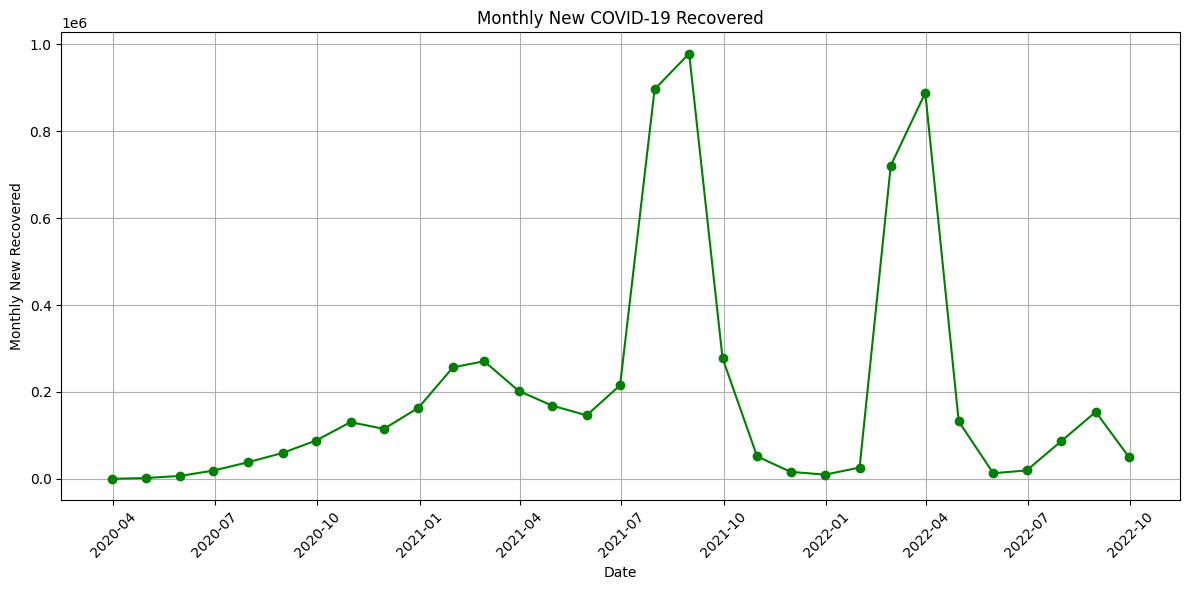

In [27]:
# Resample data per bulan dan hitung kasus recorvery baru setiap bulan
monthly_deaths = df['New Recovered'].resample('M').sum()

# Buat grafik tren garis bulanan
plt.figure(figsize=(12, 6))
plt.plot(monthly_deaths.index, monthly_deaths.values, marker='o', linestyle='-', color='green')
plt.xlabel('Date')
plt.ylabel('Monthly New Recovered')
plt.title('Monthly New COVID-19 Recovered')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

##BarChart Top 10 in Location

###Hapus Indonesia

In [28]:
#melihat kolom location
df["Location"].unique()

array(['DKI Jakarta', 'Riau', 'Jawa Barat', 'Banten', 'Jawa Tengah',
       'Sulawesi Tenggara', 'Bali', 'Kalimantan Timur',
       'Daerah Istimewa Yogyakarta', 'Sumatera Utara', 'Jawa Timur',
       'Kepulauan Riau', 'Sulawesi Selatan', 'Jambi', 'Maluku', 'Papua',
       'Maluku Utara', 'Sumatera Selatan', 'Aceh', 'Kalimantan Tengah',
       'Lampung', 'Sulawesi Tengah', 'Sulawesi Utara', 'Sumatera Barat',
       'Papua Barat', 'Kalimantan Utara', 'Sulawesi Barat',
       'Kalimantan Barat', 'Kalimantan Selatan',
       'Kepulauan Bangka Belitung', 'Bengkulu', 'Nusa Tenggara Barat',
       'Nusa Tenggara Timur', 'Gorontalo'], dtype=object)

###Total Cases all Location

In [29]:
#Total Cases in every location
location_cases = df.groupby('Location')['Total Cases'].sum().reset_index()
location_cases

,Location,Total Cases
0,Aceh,19962180
1,Bali,66247623
2,Banten,100598017
3,Bengkulu,12347482
4,DKI Jakarta,545806047
5,Daerah Istimewa Yogyakarta,86090207
6,Gorontalo,6746166
7,Jambi,15700629
8,Jawa Barat,439196053
9,Jawa Tengah,273046506


###Save total cases in all location

In [30]:
#save Location_cases in csv
location_cases.to_csv('updatelocation_cases.csv', index=False)

###Gruping Top 10 Total Cases by Location

In [31]:
# Group by location dan hitung total kasus per lokasi
location_cases = df.groupby('Location')['Total Cases'].sum().reset_index()

# Sortir data berdasarkan total kasus secara menurun dan ambil 10 teratas
top_10_location_cases = location_cases.sort_values(by='Total Cases', ascending=False).head(10)
top_10_location_cases

,Location,Total Cases
4,DKI Jakarta,545806047
8,Jawa Barat,439196053
9,Jawa Tengah,273046506
10,Jawa Timur,239912685
2,Banten,100598017
14,Kalimantan Timur,89582475
5,Daerah Istimewa Yogyakarta,86090207
25,Riau,68594950
27,Sulawesi Selatan,66922249
1,Bali,66247623


###Visualisasi Barchart Top 10 Total Cases

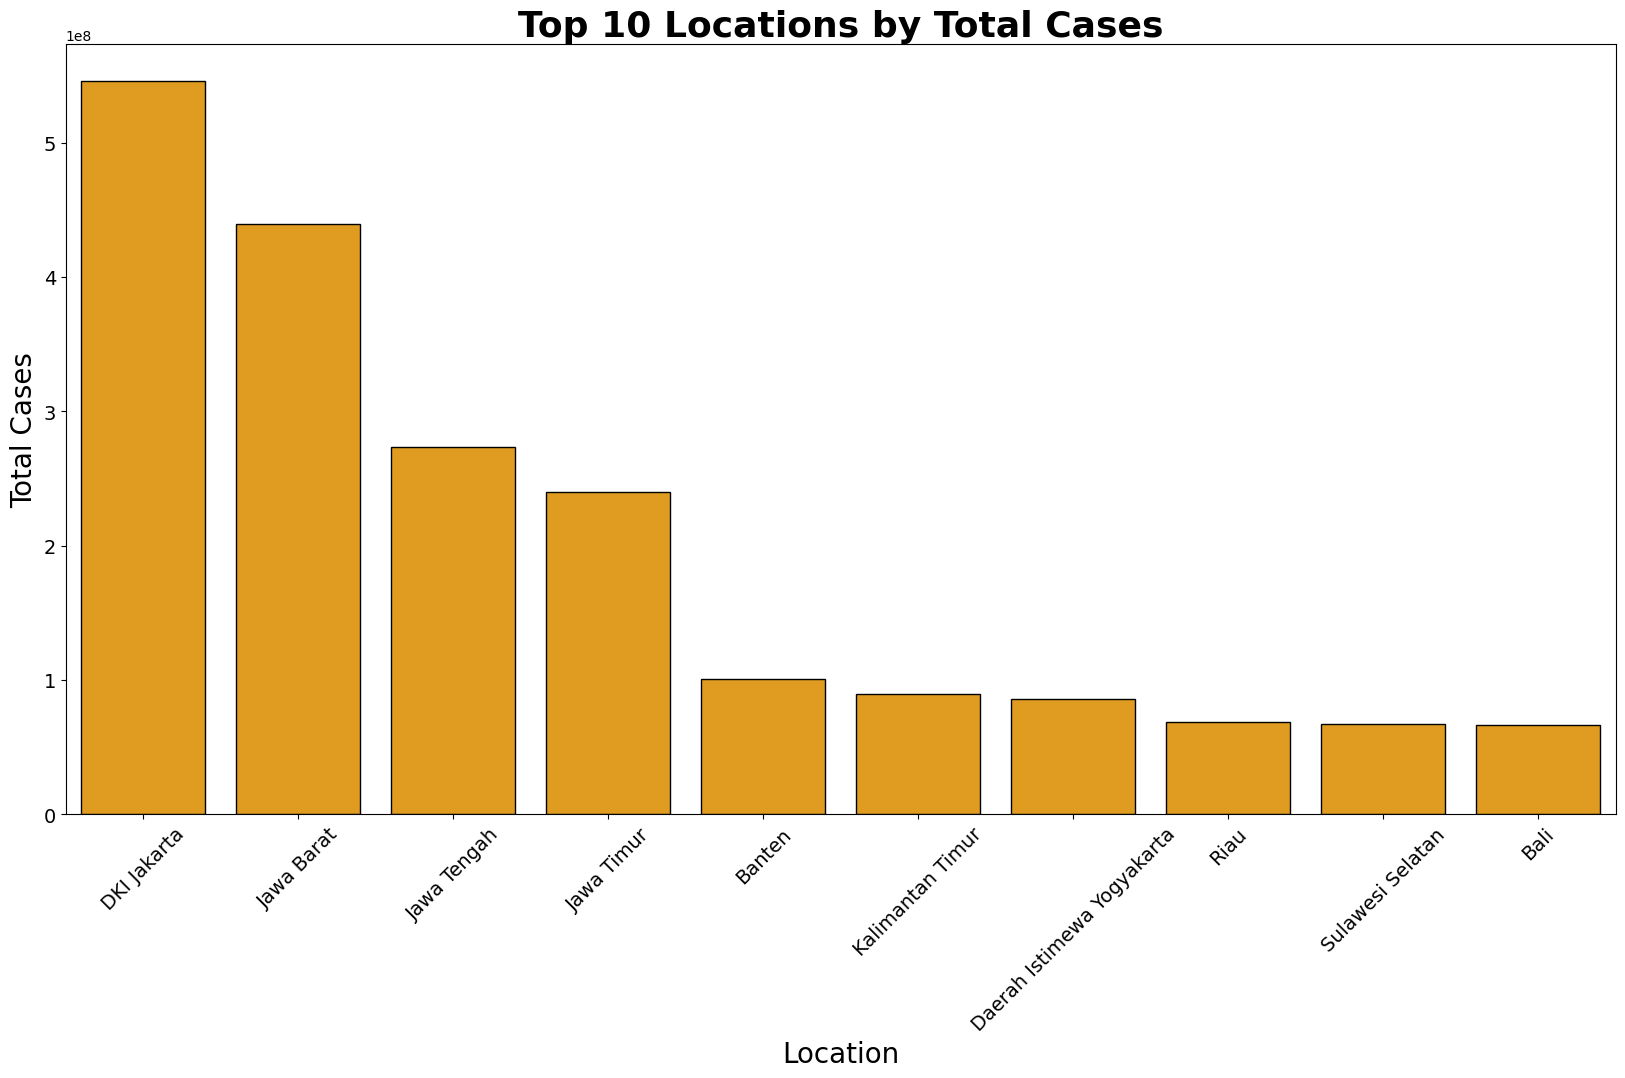

In [32]:
# Membuat bar chart untuk top 10 lokasi dengan total kasus terbanyak
plt.figure(figsize=(20, 10))
sns.barplot(data=top_10_location_cases, x='Location', y='Total Cases', dodge=True, edgecolor='black', color='orange')

plt.xlabel('Location', fontsize=20)
plt.ylabel('Total Cases', fontsize=20)
plt.title('Top 10 Locations by Total Cases', fontsize=26, fontweight='bold')
plt.xticks(rotation=45, fontsize=14)
plt.yticks(fontsize=14)
plt.show()

###Save data top 10 total cases in csv

In [33]:
#menyimpan data top_10_location_cases dalam bentuk csv
top_10_location_cases.to_csv('top_10_location_cases.csv', index=False)

###Gruping Top 10 Total Deaths by Location

In [34]:
# Group by location dan hitung total kematian per lokasi
location_death = df.groupby('Location')['Total Deaths'].sum().reset_index()

# Sortir data berdasarkan total kematian secara menurun dan ambil 10 teratas
top_10_location_deaths = location_death.sort_values(by='Total Deaths', ascending=False).head(10)
top_10_location_deaths

,Location,Total Deaths
10,Jawa Timur,15384287
9,Jawa Tengah,14972030
4,DKI Jakarta,7672746
8,Jawa Barat,7097250
14,Kalimantan Timur,2644808
5,Daerah Istimewa Yogyakarta,2484820
1,Bali,2017352
25,Riau,2012582
18,Lampung,1796384
32,Sumatera Selatan,1582127


###Visualisasi Barchart Top 10 Total Deaths

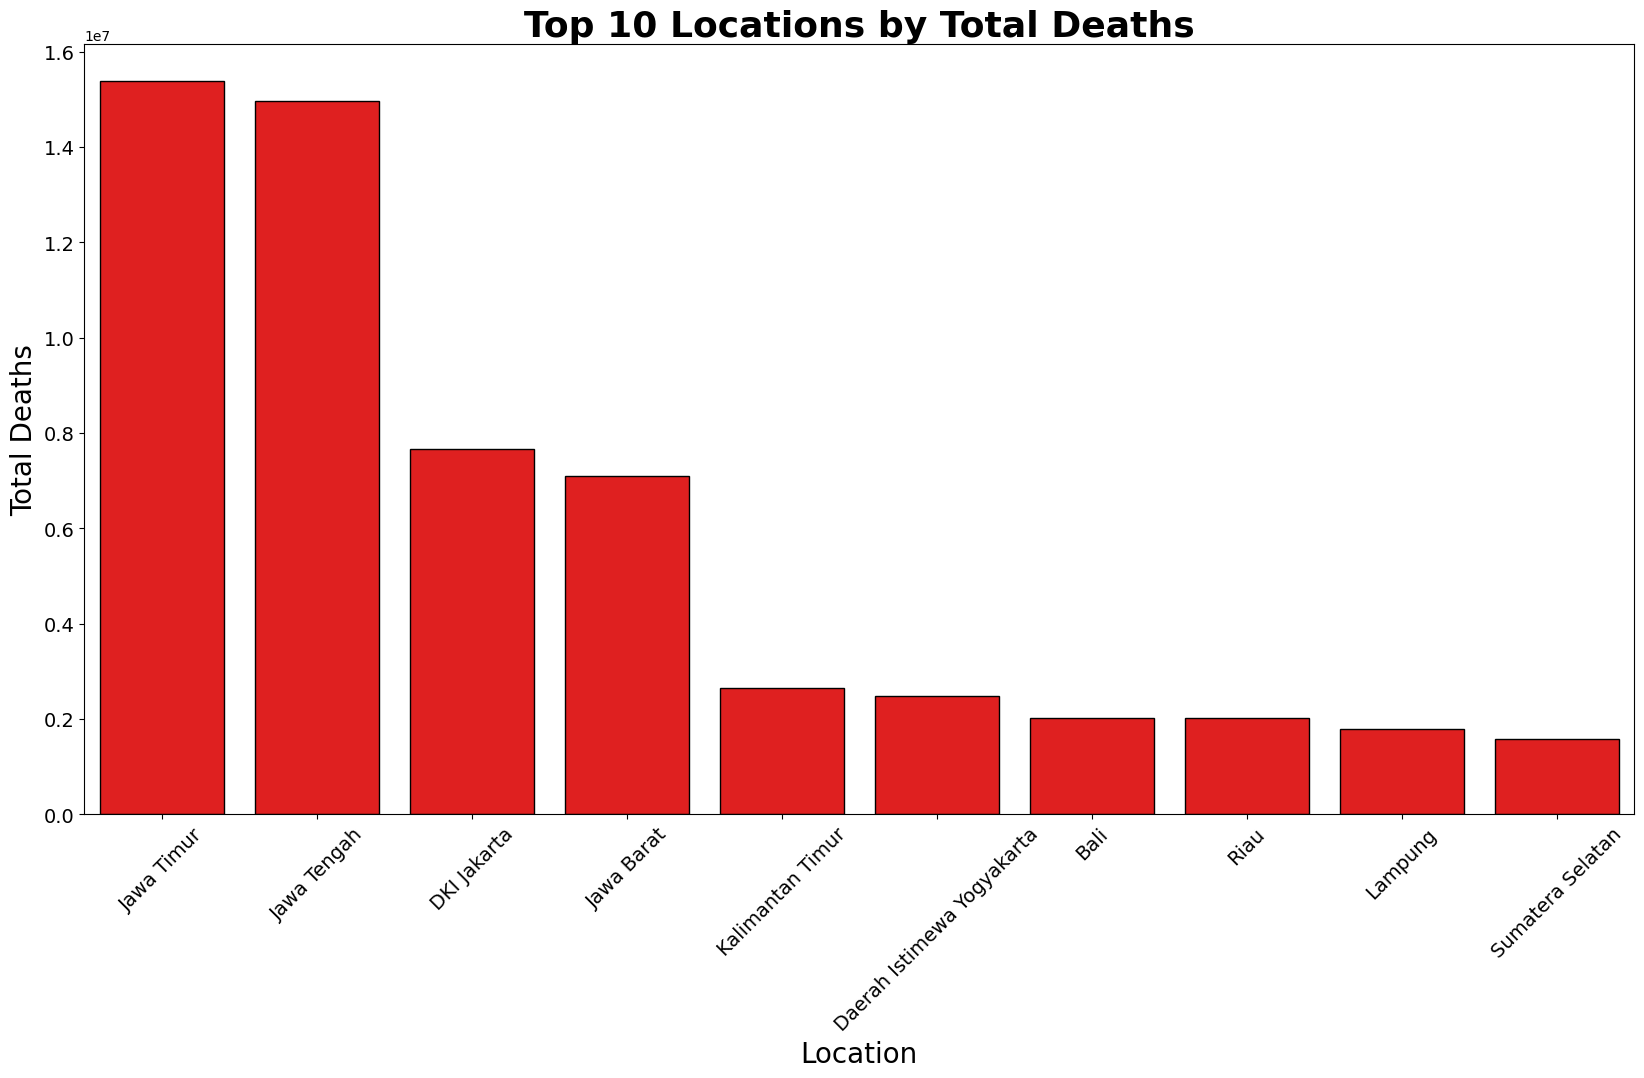

In [35]:
# Membuat bar chart untuk top 10 lokasi dengan total kasus terbanyak
plt.figure(figsize=(20, 10))
sns.barplot(data=top_10_location_deaths, x='Location', y='Total Deaths', dodge=True, edgecolor='black', color='red')

plt.xlabel('Location', fontsize=20)
plt.ylabel('Total Deaths', fontsize=20)
plt.title('Top 10 Locations by Total Deaths', fontsize=26, fontweight='bold')
plt.xticks(rotation=45, fontsize=14)
plt.yticks(fontsize=14)
plt.show()

###Save data top 10 total deaths in csv

In [36]:
#menyimpan data top_10_location_deaths dalam bentuk csv
top_10_location_deaths.to_csv('top_10_location_deaths.csv', index=False)

###Gruping Top 10 Total Recovered by Location

In [37]:
# Group by location dan hitung total kematian per lokasi
location_recovery = df.groupby('Location')['Total Recovered'].sum().reset_index()

# Sortir data berdasarkan total kematian secara menurun dan ambil 10 teratas
top_10_location_recovery = location_recovery.sort_values(by='Total Recovered', ascending=False).head(10)
top_10_location_recovery

,Location,Total Recovered
4,DKI Jakarta,526474096
8,Jawa Barat,412874932
9,Jawa Tengah,246232049
10,Jawa Timur,220227772
2,Banten,95323211
14,Kalimantan Timur,84393243
5,Daerah Istimewa Yogyakarta,79579777
25,Riau,64845902
27,Sulawesi Selatan,63624765
1,Bali,62075015


###Visualisasi Barchart Top 10 Total Recovered

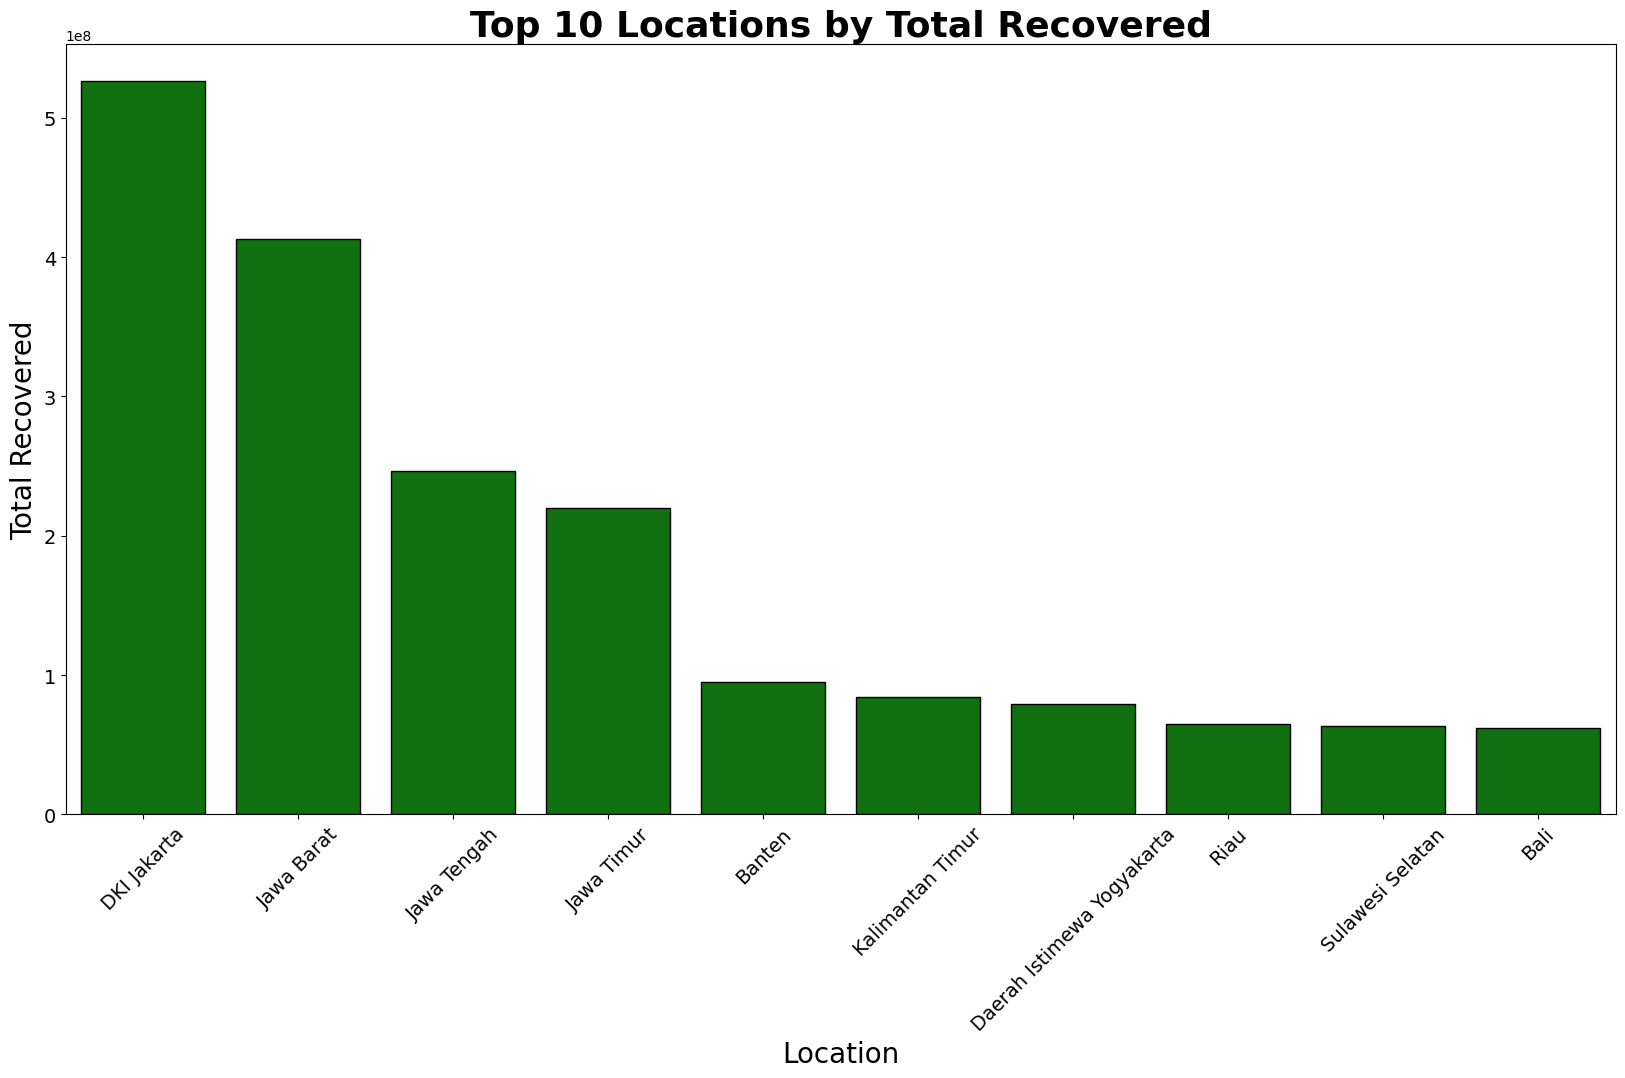

In [38]:
# Membuat bar chart untuk top 10 lokasi dengan total recovery terbanyak
plt.figure(figsize=(20, 10))
sns.barplot(data=top_10_location_recovery, x='Location', y='Total Recovered', dodge=True, edgecolor='black', color='green')

plt.xlabel('Location', fontsize=20)
plt.ylabel('Total Recovered', fontsize=20)
plt.title('Top 10 Locations by Total Recovered', fontsize=26, fontweight='bold')
plt.xticks(rotation=45, fontsize=14)
plt.yticks(fontsize=14)
plt.show()

###Save data top 10 total recovered in csv

In [39]:
#menyimpan data top_10_location_recovery dalam bentuk csv
top_10_location_recovery.to_csv('top_10_location_recovery.csv', index=False)

#Clustering

##Encoding

In [48]:
#melakukan encoding datasete Location, Location Level, Province, Island, Time Zone
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df['Location'] = label_encoder.fit_transform(df['Location'])
df['Location Level'] = label_encoder.fit_transform(df['Location Level'])
df['Province'] = label_encoder.fit_transform(df['Province'])
df['Island'] = label_encoder.fit_transform(df['Island'])
df['Time Zone'] = label_encoder.fit_transform(df['Time Zone'])


<ipython-input-48-aa11d58a7ed7>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Location'] = label_encoder.fit_transform(df['Location'])
<ipython-input-48-aa11d58a7ed7>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Location Level'] = label_encoder.fit_transform(df['Location Level'])
<ipython-input-48-aa11d58a7ed7>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documenta

##Standasrisasi data serta Visualisasi Elbow Method dan K-Means Clustering

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

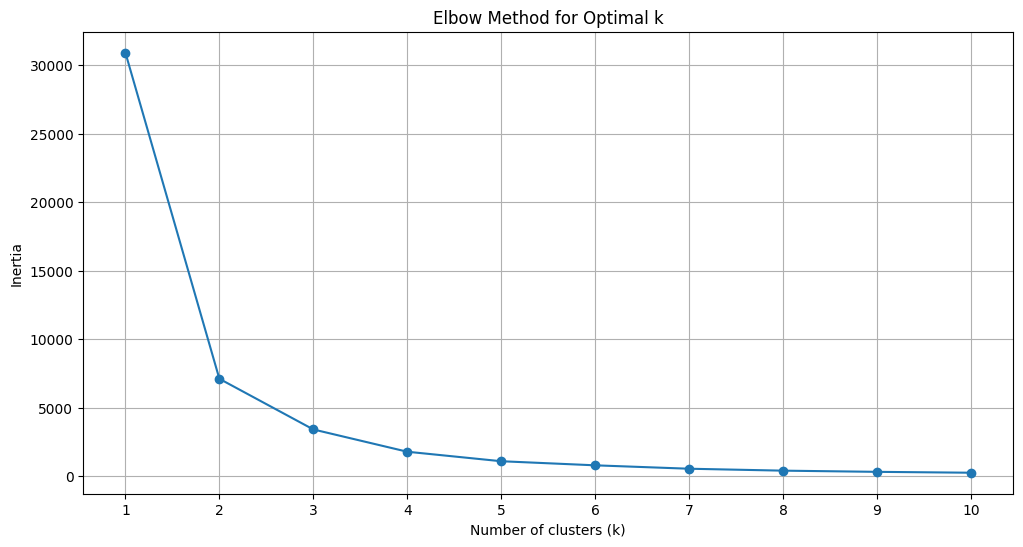

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


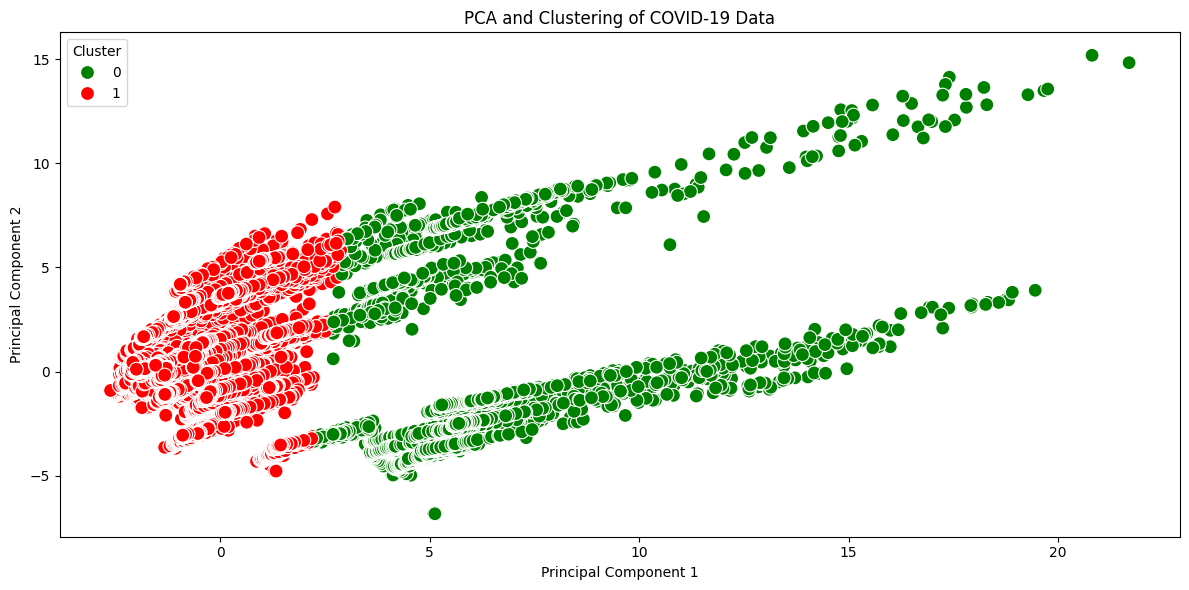

        PC1       PC2  Cluster
0  1.513159  1.264933        1
1  1.509328  1.273169        1
2 -1.476465 -1.059570        1
3  1.505166  1.279638        1
4  4.379034 -3.420976        0


In [60]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# Contoh data: Pastikan data sudah di-load
# df = pd.read_csv('data.csv')

# Preprocessing: Standarisasi data
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df[['Location', 'Location Level', 'New Cases', 'New Deaths','New Recovered','Total Active Cases', 'Province', 'Island', 'Time Zone', 'Total Regencies',  'Total Cities', 'Total Districts', 'Total Urban Villages', 'Total Rural Villages', 'Area (km2)', 'Population', 'Population Density', 'Longitude', 'Latitude', 'New Cases per Million', 'Total Cases per Million', 'New Deaths per Million', 'Total Deaths per Million', 'Total Deaths per 100rb', 'Case Fatality Rate', 'Case Recovered Rate', 'Growth Factor of New Cases', 'Growth Factor of New Deaths', 'Total Cases Scaled']])

# Elbow method untuk menentukan jumlah cluster optimal
inertia = []
k_range = range(1, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df[['Total Cases Scaled']])
    inertia.append(kmeans.inertia_)

# Plot Elbow method
plt.figure(figsize=(12, 6))
plt.plot(k_range, inertia, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.xticks(k_range)
plt.grid(True)
plt.show()

# Melakukan PCA
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_scaled)

# Membuat DataFrame hasil PCA
df_pca = pd.DataFrame(data=df_pca, columns=['PC1', 'PC2'])

# Menentukan jumlah cluster optimal dengan Elbow Method
kmeans = KMeans(n_clusters=2, random_state=42)
df_pca['Cluster'] = kmeans.fit_predict(df_pca)

# Palet warna khusus untuk cluster
palette = {0: 'green', 1: 'red'}

# Visualisasi hasil PCA dan clustering

plt.figure(figsize=(12, 6))
sns.scatterplot(data=df_pca, x='PC1', y='PC2', hue='Cluster', palette=palette, s=100)
plt.title('PCA and Clustering of COVID-19 Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.tight_layout()
plt.show()

# Menampilkan hasil clustering
print(df_pca.head())

##Analysis in Cluster 0 and Cluster 1

###Analysis Cluster 0

In [61]:
#perhitungan rata-rata New Deaths dan New Cases pada Cluster 0
cluster_0_data = df[df['Cluster'] == 0]
average_new_deaths_cluster_0 = cluster_0_data['New Deaths'].mean()
average_new_cases_cluster_0 = cluster_0_data['New Cases'].mean()

print("Rata-rata New Deaths pada Cluster 0:", average_new_deaths_cluster_0)
print("Rata-rata New Cases pada Cluster 0:", average_new_cases_cluster_0)

Rata-rata New Deaths pada Cluster 0: 4.303114988753323
Rata-rata New Cases pada Cluster 0: 144.3280621634517


###Analysis Cluster 1

In [62]:
#perhitungan rata-rata New Deaths dan New Cases pada Cluster 1
cluster_1_data = df[df['Cluster'] == 1]
average_new_deaths_cluster_1 = cluster_1_data['New Deaths'].mean()
average_new_cases_cluster_1 = cluster_1_data['New Cases'].mean()

print("Rata-rata New Deaths pada Cluster 1:", average_new_deaths_cluster_1)
print("Rata-rata New Cases pada Cluster 1:", average_new_cases_cluster_1)

Rata-rata New Deaths pada Cluster 1: 20.34622823984526
Rata-rata New Cases pada Cluster 1: 1394.2198581560283


###Location in Cluster 1

###Visualisasi Cluster 0 dan 1 pada New Deaths dan New Cases

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
<ipython-input-63-804c9d8d3825>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Cluster'] = kmeans.fit_predict(df[['Total Cases Scaled']])


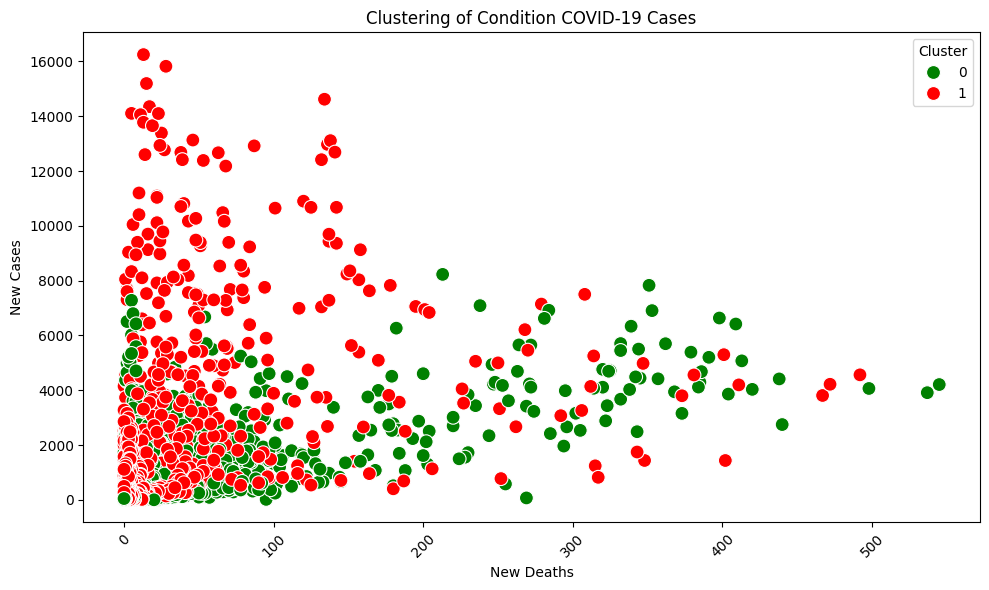

           Location ISO Code  Location  New Cases  New Deaths  New Recovered  \
Date                                                                           
2020-03-01             ID-JK         4          2           0              0   
2020-03-02             ID-JK         4          2           0              0   
2020-03-02             ID-RI        25          1           0              0   
2020-03-03             ID-JK         4          2           0              0   
2020-03-03             ID-JB         8          1           1              0   
...                      ...       ...        ...         ...            ...   
2022-09-15             ID-SG        29          2           0              0   
2022-09-15             ID-SA        30         37           0              0   
2022-09-15             ID-SB        31         13           0              3   
2022-09-15             ID-SS        32         16           0              1   
2022-09-15             ID-SU        33  

In [63]:
# Menentukan jumlah cluster optimal dari plot Elbow
optimal_k = 2

# Melakukan clustering menggunakan K-Means dengan jumlah cluster optimal
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
df['Cluster'] = kmeans.fit_predict(df[['Total Cases Scaled']])

# Palet warna khusus untuk cluster
palette = {0: 'green', 1: 'red'}

# Visualisasi hasil clustering
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='New Deaths', y='New Cases', hue='Cluster', palette=palette, s=100)
plt.xlabel('New Deaths')
plt.ylabel('New Cases')
plt.title('Clustering of Condition COVID-19 Cases')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Menampilkan hasil clustering
print(df)